In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor 

In [2]:
df=pd.read_csv(r'C:\Users\hrish\Downloads\TISC Historical Data.csv')

In [3]:
df.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [4]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,07-03-2025,151.79,149.74,152.44,149.36,19.76M,0.90%
1,06-03-2025,150.44,146.79,152.20,146.20,79.12M,2.97%
2,05-03-2025,146.10,139.00,146.49,139.00,62.11M,4.85%
3,04-03-2025,139.34,136.15,140.94,135.81,28.63M,0.56%
4,03-03-2025,138.57,137.00,139.05,134.31,31.15M,1.00%


In [5]:
df.drop('Date',axis=1,inplace=True) 
df.drop('Price',axis=1,inplace=True) 
df.drop('Change %',axis=1,inplace=True ) 
df.drop('Vol.',axis=1,inplace=True)

In [6]:
df

,Open,High,Low
0,149.74,152.44,149.36
1,146.79,152.20,146.20
2,139.00,146.49,139.00
3,136.15,140.94,135.81
4,137.00,139.05,134.31
...,...,...,...
2497,30.95,32.30,30.95
2498,32.03,32.43,31.06
2499,34.09,34.16,32.93
2500,35.14,35.24,33.92


<Axes: >

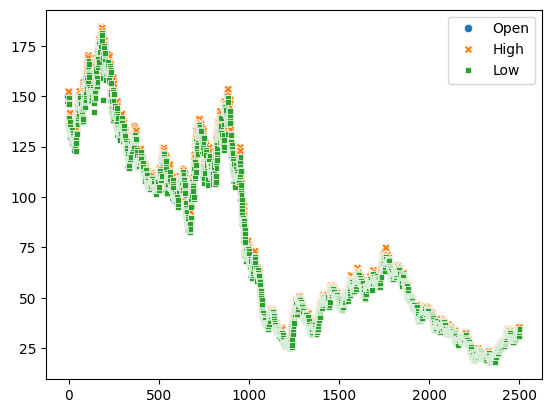

In [9]:
import seaborn as sns 
sns.scatterplot(df)

In [10]:
from xgboost import XGBRegressor

In [11]:
X = df[['Open','Low']]
y = df['High'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),  # You can adjust alpha for regularization strength
    "Ridge Regression": Ridge(),  # L2 Regularization
    "Elastic Net": ElasticNet(),  # Mix of L1 and L2
    "Random Forest": RandomForestRegressor(),
    "Support Vector Regression": SVR(),
    "Gradient boosting":GradientBoostingRegressor(), 
    "Decision tree ": DecisionTreeRegressor(), 
    "Adaboost reg":AdaBoostRegressor(), 
    "xgboost": XGBRegressor()
}
from sklearn.metrics import r2_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R² Score": r2}
for name, metrics in results.items():
    print(f"{name}: Mean Squared Error = {metrics['MSE']:.2f}, R² Score = {metrics['R² Score']:.2f}")

Linear Regression: Mean Squared Error = 0.85, R² Score = 1.00
Lasso Regression: Mean Squared Error = 1.77, R² Score = 1.00
Ridge Regression: Mean Squared Error = 0.85, R² Score = 1.00
Elastic Net: Mean Squared Error = 87.76, R² Score = 0.96
Random Forest: Mean Squared Error = 1.11, R² Score = 1.00
Support Vector Regression: Mean Squared Error = 13.81, R² Score = 0.99
Gradient boosting: Mean Squared Error = 1.24, R² Score = 1.00
Decision tree : Mean Squared Error = 1.63, R² Score = 1.00
Adaboost reg: Mean Squared Error = 6.02, R² Score = 1.00
xgboost: Mean Squared Error = 1.35, R² Score = 1.00


In [15]:
from joblib import dump, load

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train 
model = Ridge(alpha=0.31257158496882353)
model.fit(X_train_scaled, y_train)

Ridge(alpha=0.31257158496882353)

In [39]:
import joblib
joblib.dump(model, 'tatamodel.joblib')
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [20]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
# Calculate the mean squared error and R² score
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse

0.853688103403266

In [15]:
import numpy as np 
from sklearn.model_selection import GridSearchCV

In [30]:
alpha_values = np.logspace(-10, 10, 21)
param_grid = {'alpha': alpha_values}

In [31]:
ridge = Ridge()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, verbose=1)

In [32]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.e-10, 1.e-09, 1.e-08, 1.e-07, 1.e-06, 1.e-05, 1.e-04, 1.e-03,
       1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04, 1.e+05,
       1.e+06, 1.e+07, 1.e+08, 1.e+09, 1.e+10])},
             scoring='neg_mean_squared_error', verbose=1)

In [33]:
y_pred = grid_search.predict(X_test_scaled)

In [34]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test set: {mse}")

Mean Squared Error on test set: 0.852305126174012


In [35]:
from sklearn.model_selection import RandomizedSearchCV

# Create a parameter distribution
param_dist = {'alpha': np.logspace(-10, 10, 100)}  # 100 points, you can adjust

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=ridge,
    param_distributions=param_dist,
    n_iter=100,  # Number of iterations to sample
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1,
    random_state=42
)

In [36]:
random_search.fit(X_train_scaled, y_train) 
y_pred_random = random_search.predict(X_test_scaled)

# Evaluate the model
mse_random = mean_squared_error(y_test, y_pred_random)
print(f"Mean Squared Error on test set (Random Search): {mse_random}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mean Squared Error on test set (Random Search): 0.8518047291333957


In [37]:
best_alpha_random = random_search.best_params_['alpha']
print(f"Best alpha from Random Search: {best_alpha_random}")

Best alpha from Random Search: 0.31257158496882353
